In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df=pd.read_csv(r"C:\Users\arpit\Downloads\WB_population_cleaned.csv",encoding='unicode_escape')

In [130]:
df.head()

,iso3,country,year,population
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17195 entries, 0 to 17194
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3        16935 non-null  object 
 1   country     17195 non-null  object 
 2   year        17195 non-null  int64  
 3   population  17195 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 537.5+ KB


In [116]:
pd.isnull(df)

,iso3,country,year,population
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
17190,False,False,False,False
17191,False,False,False,False
17192,False,False,False,False
17193,False,False,False,False


In [132]:
pd.isnull(df).sum()

iso3          0
country       0
year          0
population    0
dtype: int64

In [117]:
df.shape

(17195, 4)

In [131]:
df.dropna(inplace=True)

In [119]:
pd.isnull(df).sum()

iso3          0
country       0
year          0
population    0
dtype: int64

In [133]:
#Changing datatype
df['population']=df['population'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16935 entries, 0 to 17194
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   iso3        16935 non-null  object
 1   country     16935 non-null  object
 2   year        16935 non-null  int64 
 3   population  16935 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 661.5+ KB


In [134]:
df.head(200)

,iso3,country,year,population
3120,AFG,Afghanistan,2024.0,42647492
3121,AFG,Afghanistan,2023.0,41454761
3122,AFG,Afghanistan,2022.0,40578842
3123,AFG,Afghanistan,2021.0,40000412
3124,AFG,Afghanistan,2020.0,39068979
...,...,...,...,...
3315,ASM,American Samoa,2024.0,46765
3316,ASM,American Samoa,2023.0,47521
3317,ASM,American Samoa,2022.0,48342
3318,ASM,American Samoa,2021.0,49225


In [19]:
df.columns

Index(['iso3', 'country', 'year', 'population'], dtype='object')

In [136]:
#cleaning of data countries
df_countries=df[df['iso3'].str.len()==3]
df_countries.head()

,iso3,country,year,population
3120,AFG,Afghanistan,2024.0,42647492
3121,AFG,Afghanistan,2023.0,41454761
3122,AFG,Afghanistan,2022.0,40578842
3123,AFG,Afghanistan,2021.0,40000412
3124,AFG,Afghanistan,2020.0,39068979


In [137]:
#to remove duplicates
df_countries.drop_duplicates()

,iso3,country,year,population
3120,AFG,Afghanistan,2024.0,42647492
3121,AFG,Afghanistan,2023.0,41454761
3122,AFG,Afghanistan,2022.0,40578842
3123,AFG,Afghanistan,2021.0,40000412
3124,AFG,Afghanistan,2020.0,39068979
...,...,...,...,...
17190,ZWE,Zimbabwe,1964.0,4320006
17191,ZWE,Zimbabwe,1963.0,4185877
17192,ZWE,Zimbabwe,1962.0,4055959
17193,ZWE,Zimbabwe,1961.0,3930401


In [23]:
#no. of country
df_countries['country'].nunique()

261

In [138]:
world_pop=df_countries.groupby('year')['population'].sum()

In [95]:
world_pop.head(20)

year
1960    27473243317
1961    27856428309
1962    28373120004
1963    29012239227
1964    29657206430
           ...     
2020    76768453011
2021    77542644618
2022    78312726565
2023    79118350886
2024    79964562001
Name: population, Length: 65, dtype: int64

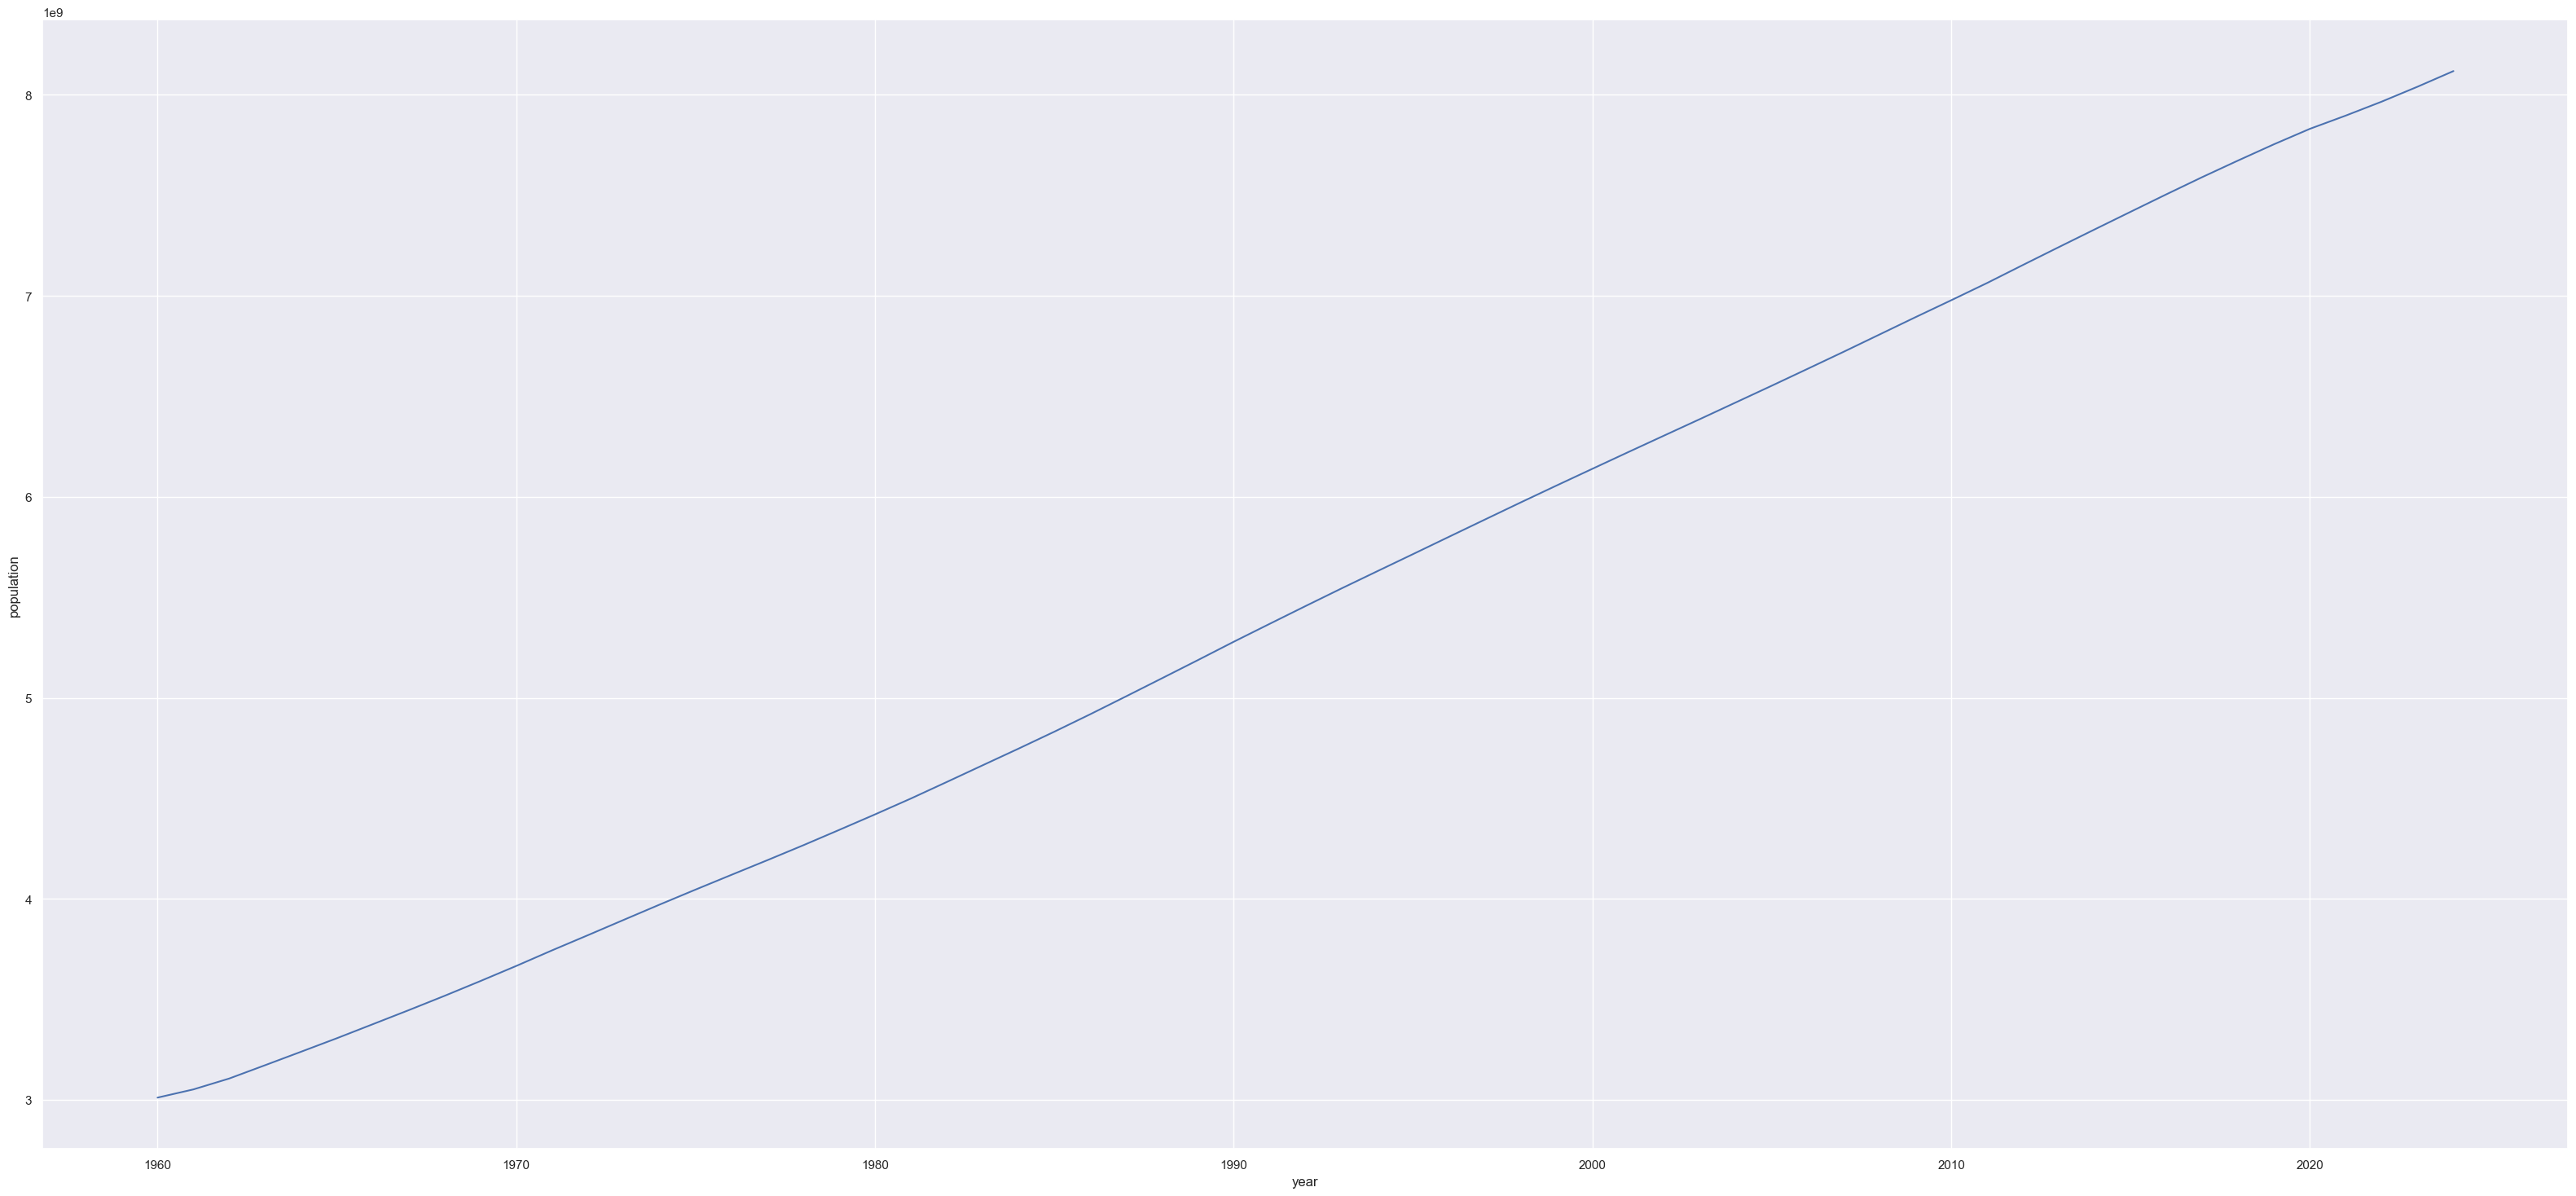

In [143]:
#world_pop.plot(title='World Population over Time')
plt.plot(world_pop.index,world_pop.values)
plt.xlabel('year')
plt.ylabel('population')
plt.show()

In [140]:
latest_year=df_countries['year'].max()
top=df_countries[df_countries['year']==latest_year].sort_values('population',ascending=False).head(10)
top[['country','population']]

,country,population
8905,India,1450935791
5785,China,1408975000
16510,United States,340110988
8970,Indonesia,283487931
12805,Pakistan,251269164
12480,Nigeria,232679478
4810,Brazil,211998573
4095,Bangladesh,173562364
13585,Russian Federation,143533851
7280,Ethiopia,132059767


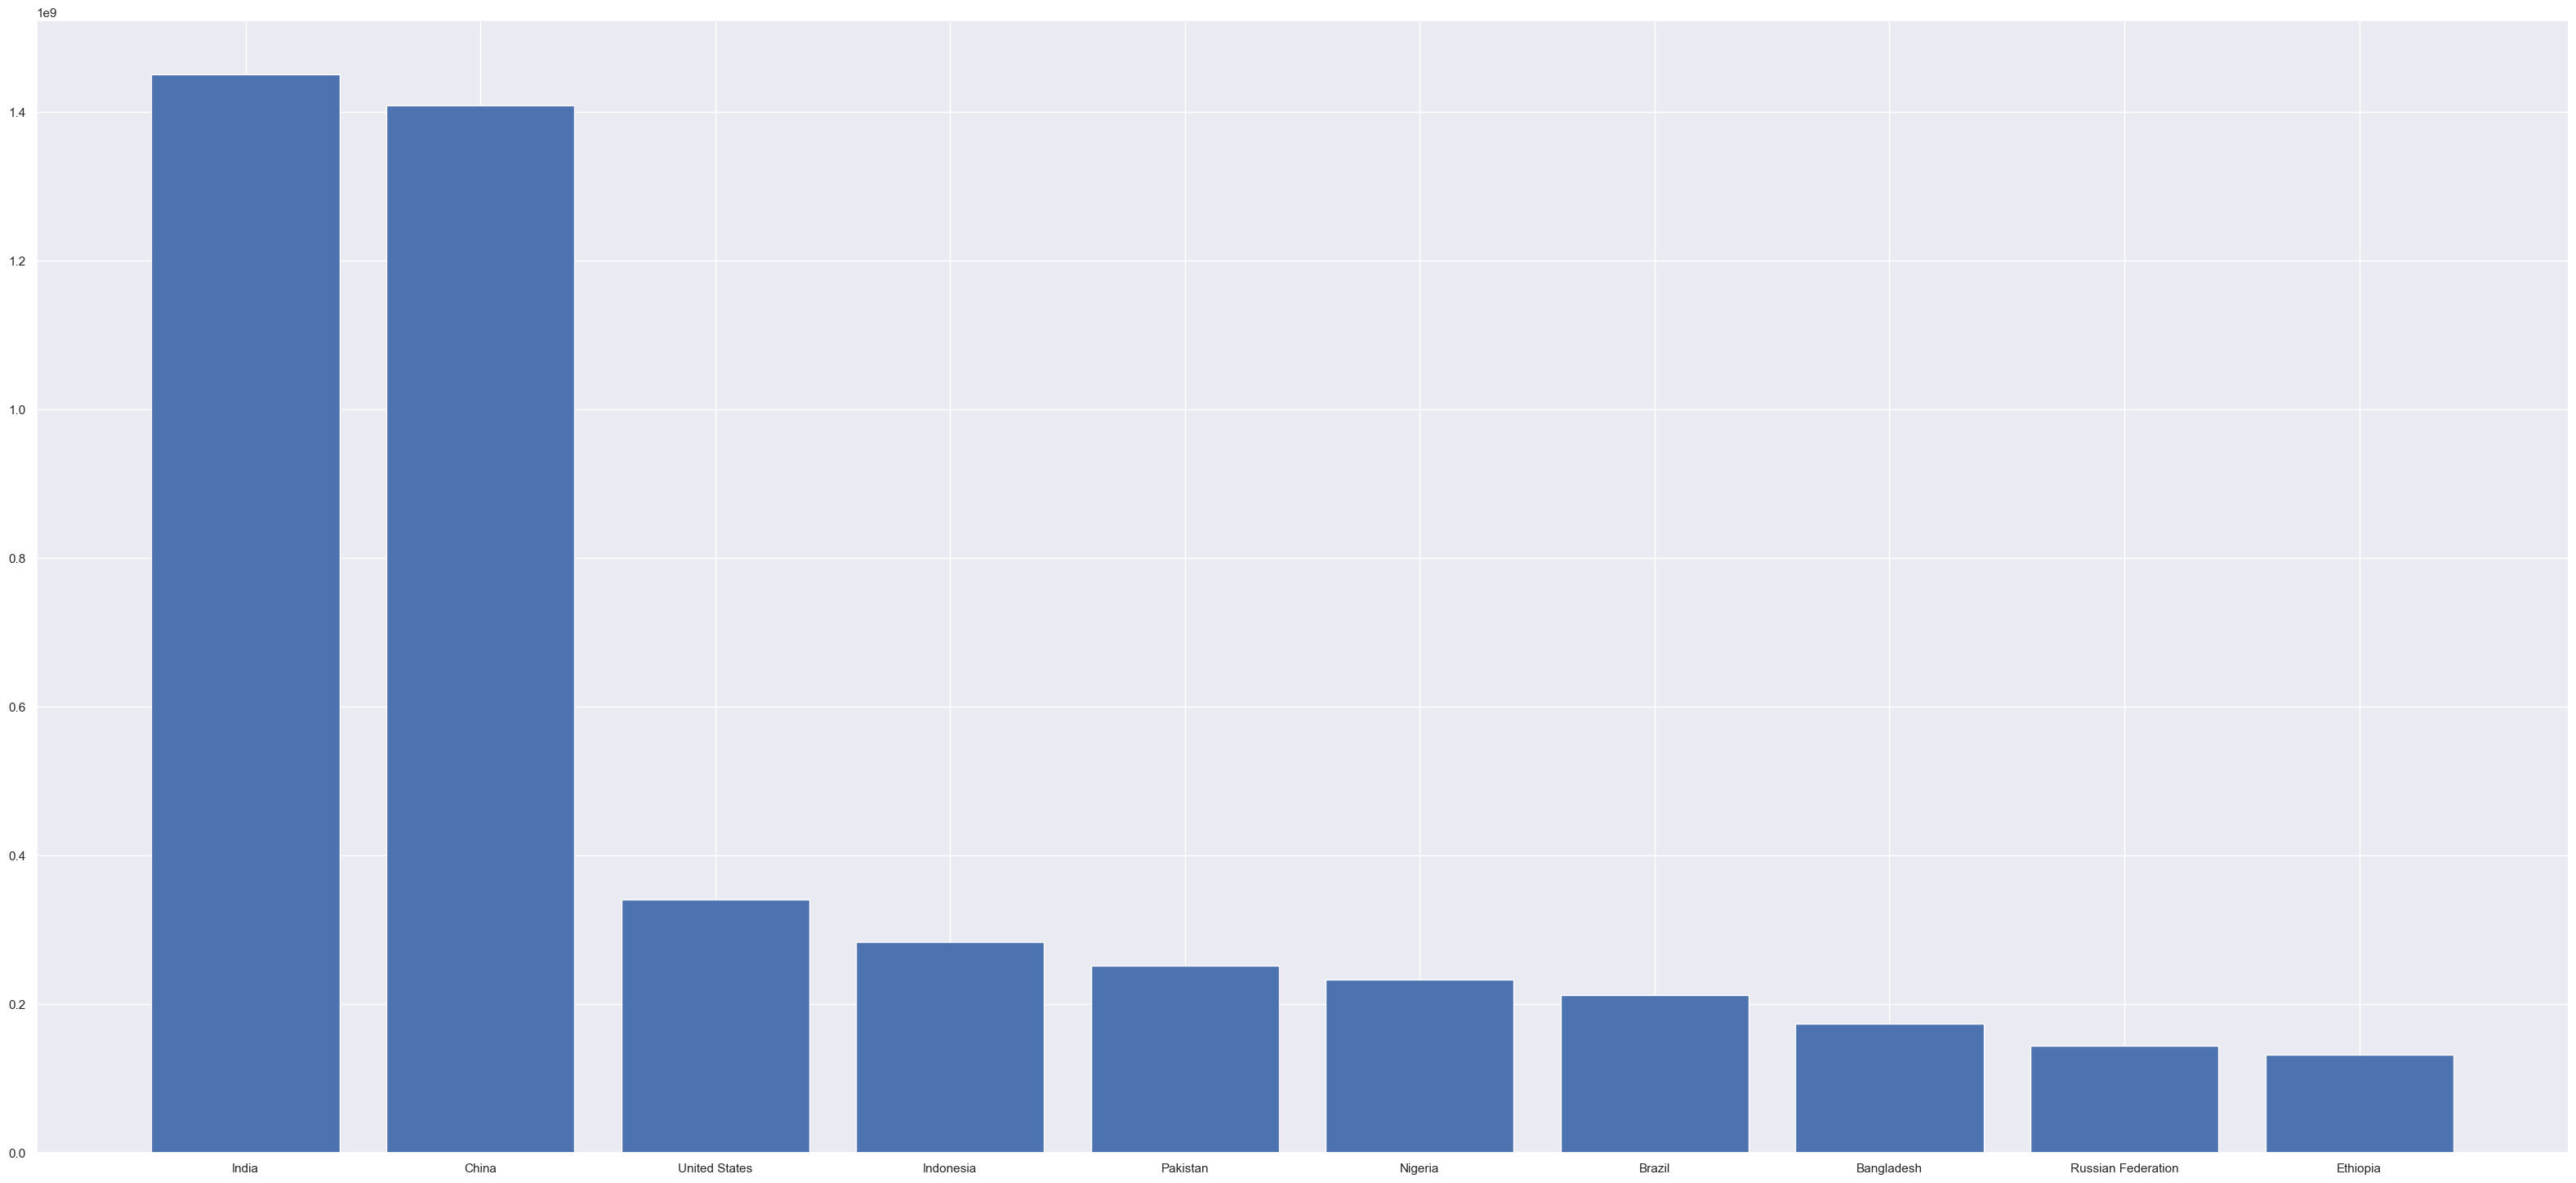

In [142]:
plt.bar(top['country'],top['population'])
sns.set(rc={'figure.figsize':(40,18)})
plt.show()

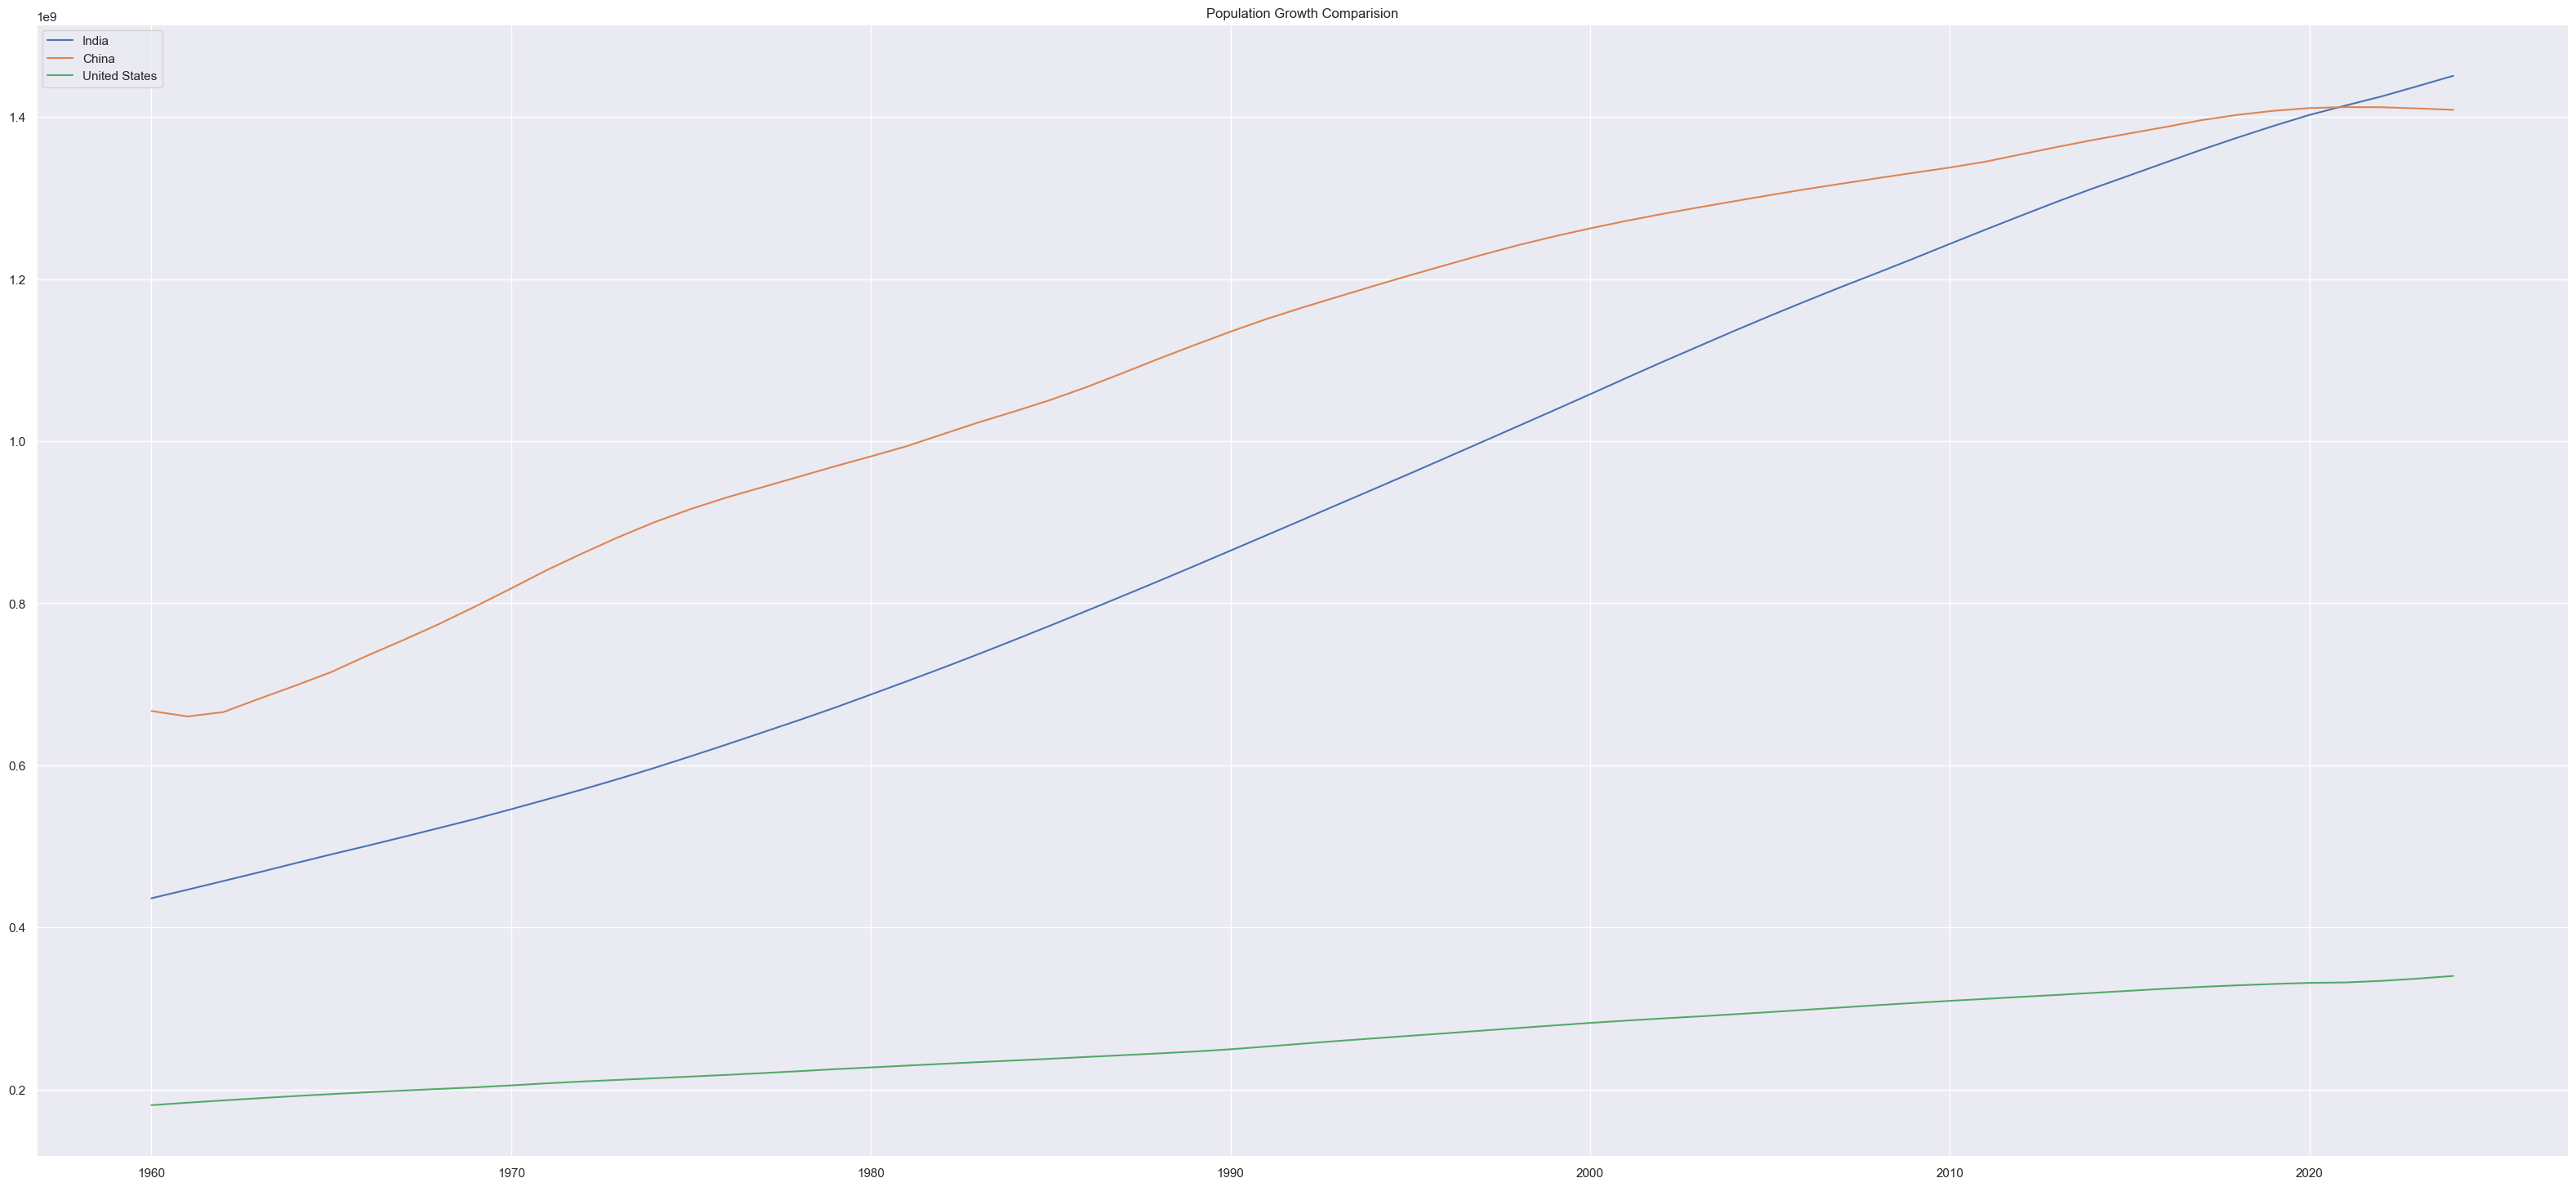

In [144]:
# growth btwn india china unitedstates
countries=['India','China','United States']
data=df[df['country'].isin(countries)]
for c in countries:
    datavalue=data[data['country']==c]
    plt.plot(datavalue['year'],datavalue['population'],label=c)

plt.legend()
plt.title('Population Growth Comparision')
plt.show()

In [145]:
#finding growth rate 
df=df.sort_values(['country','year'])
df['growth_rate']=df.groupby('country')['population'].pct_change()*100
df.head(20)

,iso3,country,year,population,growth_rate
3184,AFG,Afghanistan,1960.0,9035043,NaN
3183,AFG,Afghanistan,1961.0,9214083,1.981618
3182,AFG,Afghanistan,1962.0,9404406,2.065566
3181,AFG,Afghanistan,1963.0,9604487,2.127524
3180,AFG,Afghanistan,1964.0,9814318,2.184718
3179,AFG,Afghanistan,1965.0,10036008,2.258843
3178,AFG,Afghanistan,1966.0,10266395,2.295604
3177,AFG,Afghanistan,1967.0,10505959,2.333477
3176,AFG,Afghanistan,1968.0,10756922,2.388768
3175,AFG,Afghanistan,1969.0,11017409,2.421576


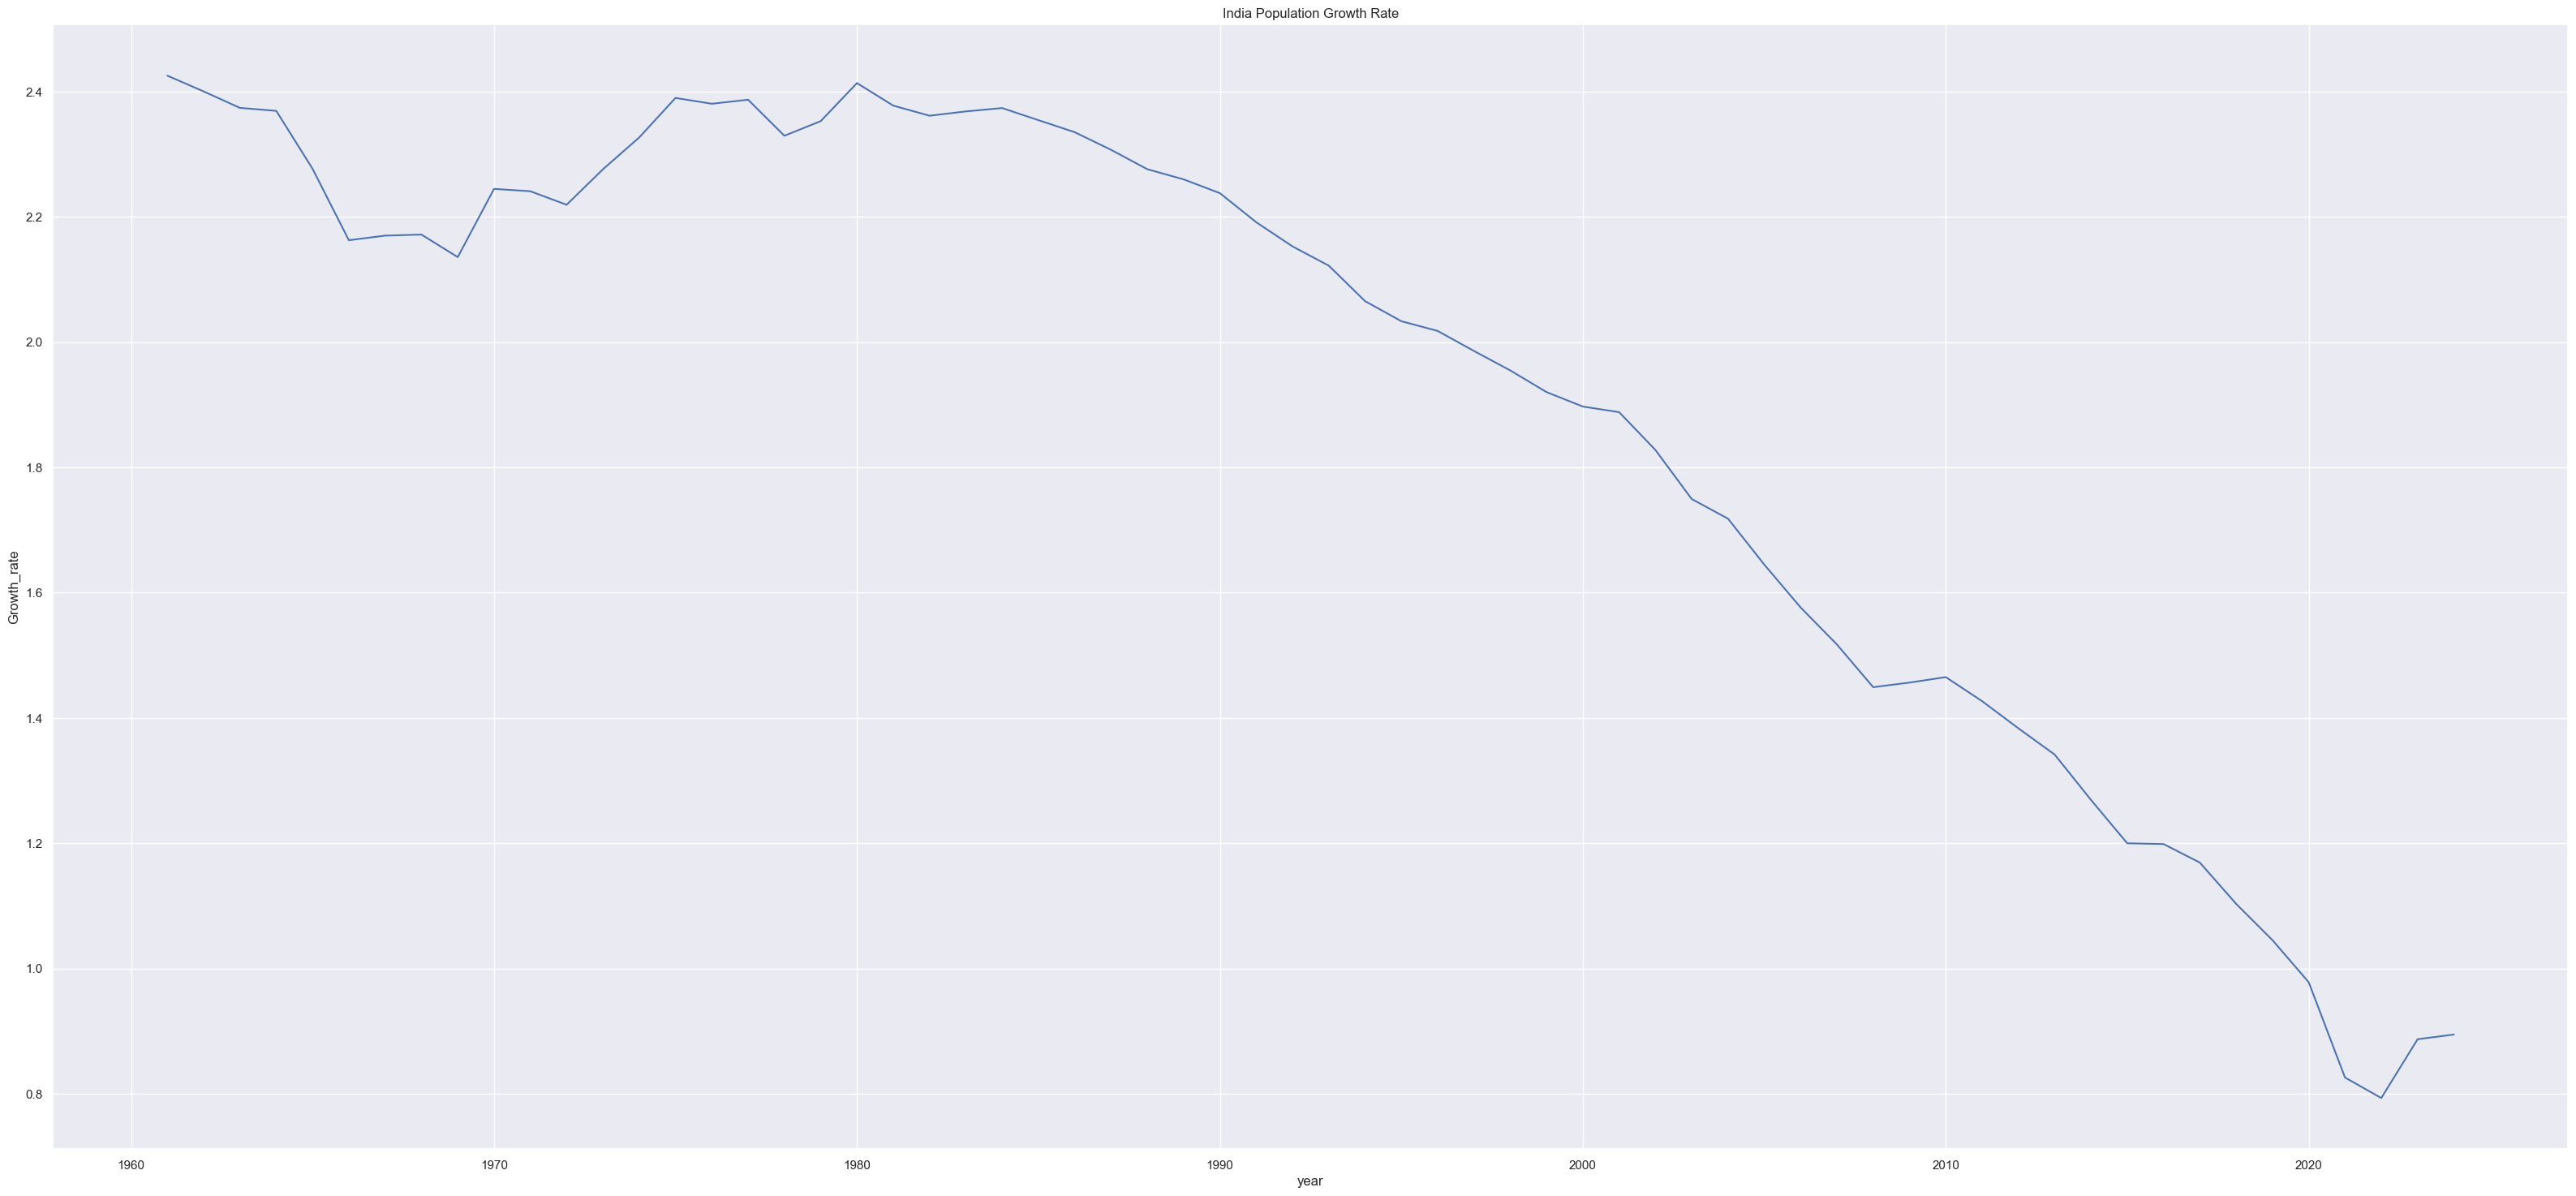

In [146]:
India=df[df['country']=='India']
plt.plot(India['year'],India['growth_rate'])
plt.xlabel('year')
plt.ylabel('Growth_rate')
plt.title('India Population Growth Rate')
sns.set(rc={'figure.figsize':(10,4)})
plt.show()

In [147]:
top5=top.head()

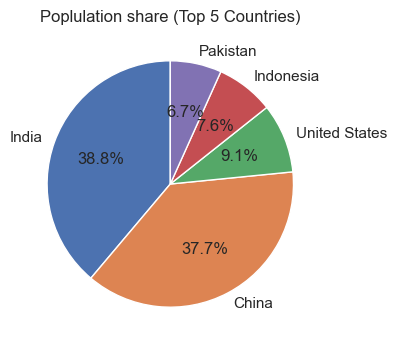

In [148]:
plt.pie(top5['population'],labels=top5['country'],autopct='%1.1f%%',startangle=90)
plt.title('Poplulation share (Top 5 Countries)')
plt.show()